# Coin Detection

In [1]:
# Opening an Image and Displaying Using OpenCV.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

coins = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/coins.png')
dime = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Dime.png')
nickel = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Nickel.png')
penny = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Penny.png')
quarter = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Quarter.png')


(-0.5, 299.5, 299.5, -0.5)

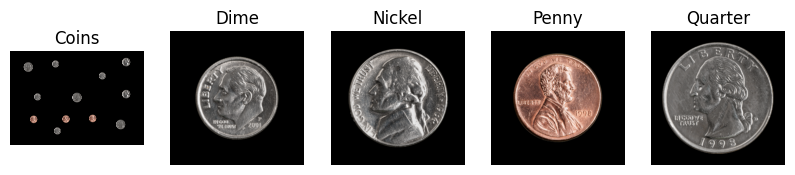

In [2]:
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))
plt.title('Coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(cv.cvtColor(dime, cv.COLOR_BGR2RGB))
plt.title('Dime')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(cv.cvtColor(nickel, cv.COLOR_BGR2RGB))
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(cv.cvtColor(penny, cv.COLOR_BGR2RGB))
plt.title('Penny')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(cv.cvtColor(quarter, cv.COLOR_BGR2RGB))
plt.title('Quarter')
plt.axis('off')

In [12]:
penny_result = cv.matchTemplate(coins, penny, cv.TM_CCOEFF_NORMED)
dime_result = cv.matchTemplate(coins, dime, cv.TM_CCOEFF_NORMED)
nickel_result = cv.matchTemplate(coins, nickel, cv.TM_CCOEFF_NORMED)
quarter_result = cv.matchTemplate(coins, quarter, cv.TM_CCOEFF_NORMED)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3251011..0.9999999].


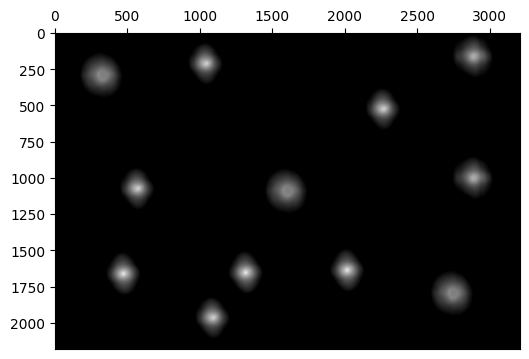

In [4]:
# cv.imshow('Dime Result',dime_result)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(penny_result, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

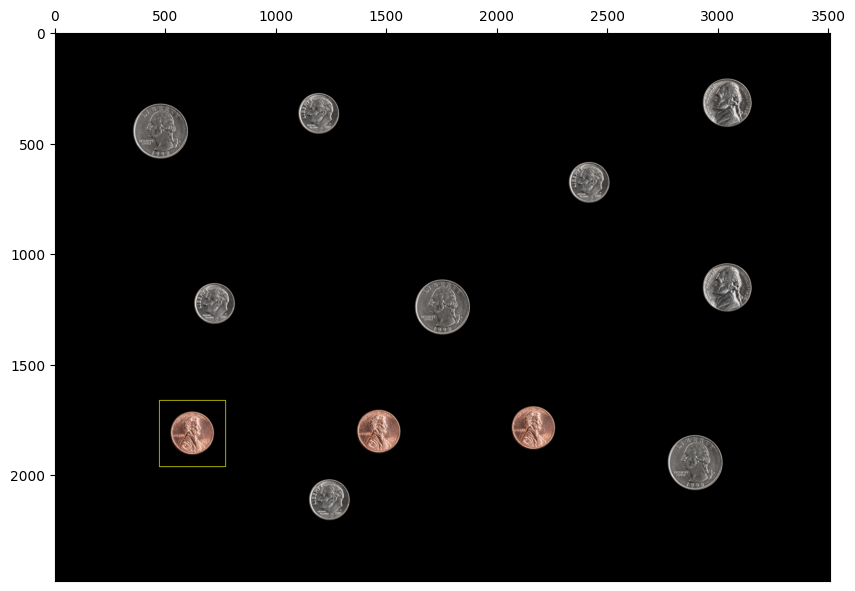

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

In [5]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(penny_result)
max_loc
w = dime.shape[1]
h = dime.shape[0]
cv.rectangle(coins, max_loc,(max_loc[0] + w, max_loc[1] + h),(0,255,255),2)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [6]:
max_val

0.9999998807907104

In [13]:
y_loc_p, x_loc_p = np.where(penny_result>=0.99)
y_loc_d, x_loc_d = np.where(dime_result>=0.99)


In [14]:
len(x_loc_d)

4